# Importing the required libraries


In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import summarytools
from skimpy import skim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import naive_bayes

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS

# Twitter Sentiment Analysis on August GOP(Grand Old Party) debate in Ohio 


In [3]:
# Importing the data
df = pd.read_csv("Downloads/Sentiment.csv")
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [15]:
summarytools.dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 6936.0 (4004.4)min < med < max:1.0 < 6936.0 < 13871.0IQR (CV) : 6935.0 (1.7),"13,871 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA30lEQVR4nO3UMQoCMRBAURXLqbOFjRfxEJ5gzpYTeArvsY2FqdOvrQgLaVbB/1+ZDGHgQ/bLsuz0/w6/XkDfcVy7KKVcI2IaeaT3fo6I2dnx2Y33eLbWbu9nq6EjYsrMx8jDtdZLZt6dHZ/deI/T55lfN4ShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxga4gWhg1ey46OS8wAAAABJRU5ErkJggg=="">",0(0.0%)
2,candidate[object],1. No candidate mentioned2. Donald Trump3. Jeb Bush4. Ted Cruz5. Ben Carson6. Mike Huckabee7. Chris Christie8. Marco Rubio9. Rand Paul10. Scott Walker11. other,"7,491 (54.0%)2,813 (20.3%)705 (5.1%)637 (4.6%)404 (2.9%)393 (2.8%)293 (2.1%)275 (2.0%)263 (1.9%)259 (1.9%)338 (2.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACSUlEQVR4nO3dMWoCYRhF0VEspxULV5UVuLZZQVaVItb2pjIgKITgOF45ZwUDF17xf4Kr8/k80LRe+gP4P/HCxAsTL0y8MPHCxAtbbbfbj3Ecd0t/yLOcTqfv4/H4ufR3PMJmHMfd4XD4WvpDnmWapv3S3/AoZjNMvDDxwsQLEy9MvDDxwsQLEy9MvDBvm2ErP0DqMpths87mO03UK5r1JPRO55dXZDbDxAsTL0y8MPHCxAsTL0y8MPHCxAvzthnmJBRmNsPuzqbJe313T0LOOa/PbIaJFyZemHhh4oWJFyZemHhh4oWJF+ZtM8xJKMxsht2cTZPZcPMk5BzUYDbDxAsTL0y8MPHCxAsTL0y8MPHCxAvzthnmJBRmNsOuZtNctlydhJyCWsxmmHhh4oWJFyZemHhh4oWJFyZemHhh3jbDnITCzGaY2QxzEgozm2HihYkXJl6YeGHihYkXJl6YeGHihXnbDHMSCjObYb+zaTJ71peT0Fz/ocd8zGaYeGHihYkXJl6YeGHihYkXJl6YeGHeNsOchMLMZpjZDHMSCjObYeKFiRcmXph4YeKFiRcmXph4YeKFiRfmYTrMPS/MbIaZzTD3vDCzGSZemHhh4oWJFyZemHhh4oWJFyZemLfNMCehMLMZZjbDnITCzGaYeGHihYkXJl6YeGHihYkXJl6YeGHeNsOchMLMZpj/zwvbXE5CwzAM0zTtl/4g/s5shokXJl6YeGHihYkXJl6YeGHihYkX5m0zzEkozGyGiRcmXph4YeKFiRf2AxTN/Grv67JsAAAAAElFTkSuQmCC"">",96(0.7%)
3,candidate_confidence[float64],Mean (sd) : 0.9 (0.2)min < med < max:0.2 < 1.0 < 1.0IQR (CV) : 0.3 (3.5),986 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABAElEQVR4nO3cMQ6CMBhAYTUmLHWFwY0TeBVPwOq1egJP5SAzCxOuxmhSIRT0vW8kHZo80uRf/u0wDBv9v93SF1Ae+6UvoDRlWZ5DCFXK2a7r7m3bXp+/GfpHhBCqpmluKWdjjMfXbz7dEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhsi+rmbpdR+NkDz11u47G8emGMDSEoSEMDWFoiFXvAu37/lTX9SXl7DejGHHEW3XooigOc4xixBHvY2jiX//OXK9Kbg+c3Up42l/hpwAAAABJRU5ErkJggg=="">",0(0.0%)
4,relevant_yn[object],1. yes,"13,871 (100.0%)",,0(0.0%)
5,relevant_yn_confidence[float64],Mean (sd) : 0.9 (0.1)min < med < max:0.3 < 1.0 < 1.0IQR (CV) : 0.0 (6.5),508 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA70lEQVR4nO3cIQ7CMBSAYSAkM8V2ArcTcBVOUMu1dgJOhWB6pmpYgipZwsL7/082FU3+9Mm3X5Zlp/gOWz9Av3Hc+gFqk3O+ppT6lrvzPD+nabq/nxn6T6SU+lLKo+XuOI7nzzNHN4ShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBoizPqptXu4ogsTeu0erugc3RBhfvQ3aq2XYRhuLXejjHlk6K7rTrQx7+iGMDSEoSFemQMrIH5Pmz0AAAAASUVORK5CYII="">",0(0.0%)
6,sentiment[object],1. Negative2. Neutral3. Positive,"8,493 (61.2%)3,142 (22.7%)2,236 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAAAwCAYAAAAfHSRCAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA3klEQVR4nO3ZsQkDMQxA0TikVGuuuKkygWfzBJkqRVy7d/pURzjs+/DfBIIPKqQ0xriJKeWcnxGxrR7kKnrvn9baa/UcRzwiYiulvFcPchW11n31DEfdVw+g/xkPzHhgxgMzHpjxwIwHZjww44EZD8x4YB6mf5AO08mXEJdrE2zK2iSt

In [18]:
df.columns

Index(['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
       'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [23]:
skim(df)

╭─────────────────────────────── skimpy summary ───────────────────────────────╮
│          Data Summary                Data Types                              │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                       │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                       │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                       │
│ │ Number of rows    │ 13871  │ │ string      │ 14    │                       │
│ │ Number of columns │ 21     │ │ float64     │ 4     │                       │
│ └───────────────────┴────────┘ │ int64       │ 3     │                       │
│                                └─────────────┴───────┘                       │
│                                   number                                     │
│ ┏━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┓  │
│ ┃ colum ┃    ┃      ┃       ┃       ┃       ┃      ┃       ┃      ┃       ┃  │
│ ┃ n_nam ┃    ┃      ┃     

In [24]:
df.describe()

,id,candidate_confidence,relevant_yn_confidence,sentiment_confidence,subject_matter_confidence,retweet_count,tweet_id
count,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,1.387100e+04
mean,6936.000000,0.855689,0.927304,0.756936,0.782801,45.803331,6.296058e+17
std,4004.357127,0.241388,0.141696,0.217682,0.258215,153.981724,9.611863e+13
min,1.000000,0.222200,0.333300,0.186000,0.222200,0.000000,6.294531e+17
25%,3468.500000,0.674200,1.000000,0.651700,0.641300,0.000000,6.294861e+17
50%,6936.000000,1.000000,1.000000,0.681300,1.000000,2.000000,6.296726e+17
75%,10403.500000,1.000000,1.000000,1.000000,1.000000,44.000000,6.296882e+17
max,13871.000000,1.000000,1.000000,1.000000,1.000000,4965.000000,6.297017e+17


In [48]:
# Percentage of columns having null values
(df.isnull().sum()/13871)*100


id                            0.000000
candidate                     0.692091
candidate_confidence          0.000000
relevant_yn                   0.000000
relevant_yn_confidence        0.000000
sentiment                     0.000000
sentiment_confidence          0.000000
subject_matter                2.350227
subject_matter_confidence     0.000000
candidate_gold               99.798140
name                          0.000000
relevant_yn_gold             99.769303
retweet_count                 0.000000
sentiment_gold               99.891861
subject_matter_gold          99.870233
text                          0.000000
tweet_coord                  99.848605
tweet_created                 0.000000
tweet_id                      0.000000
tweet_location               28.202725
user_timezone                31.742484
dtype: float64

We see that for the below columns, 99% of the values are null values. 
  1. sentiment_gold  
  2. candidate_gold
  3. relevant_yn_gold
  4. subject_matter_gold
  5. tweet_coord
Hence we can discard them.
'ID' column just represents the Index of the column, hence we can discard that also
  

In [52]:
df = df.drop(['id','candidate_gold','relevant_yn_gold','sentiment_gold','subject_matter_gold','tweet_coord'],axis=1)
df.shape

(13871, 15)

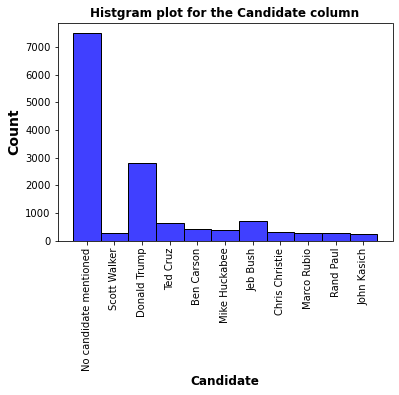

In [67]:
sns.histplot(x='candidate',data=df,color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Candidate',fontweight='bold',fontsize = 12)
plt.ylabel('Count',fontweight='bold',fontsize = 14)

plt.title("Histgram plot for the Candidate column",fontweight='bold')
plt.show()

We see that almost 54% values(more than half) have 'no candidate mentioned'. <br/>
In the rest of the data, <br/>
         20.2% of the tweets are regarding 'Donald Trump', <br/>
                         5.08% of the tweets are regarding 'Jeb Bush', <br/>
                         4.59% of the tweets are regarding 'Ted Cruz'<br/>
                         
and remaing tweets belong to other candinates<br/><br/>
The Highest tweets are regarding Donald Trump (20.28%) and the Least number  is for John Kasich(1.74%)

In [90]:
for i in df['candidate'].unique():
    print(i,"=",np.round(len(df[df['candidate']==i]) /13871 * 100,2))

No candidate mentioned = 54.0
Scott Walker = 1.87
Donald Trump = 20.28
Ted Cruz = 4.59
Ben Carson = 2.91
Mike Huckabee = 2.83
Jeb Bush = 5.08
Chris Christie = 2.11
Marco Rubio = 1.98
nan = 0.0
Rand Paul = 1.9
John Kasich = 1.74


In [91]:
# Since 54% of the column values have irrilavent values, hence we can this column for modeling.

df = df.drop(['candidate'],axis=1)
df.shape

(13871, 14)

In [908]:
# As the candidate column has been removed, candidate_confidence column will not be essence. Hence we can remove this  

df = df.drop(['candidate_confidence'],axis=1)


In [96]:
df.columns

Index(['relevant_yn', 'relevant_yn_confidence', 'sentiment',
       'sentiment_confidence', 'subject_matter', 'subject_matter_confidence',
       'name', 'retweet_count', 'text', 'tweet_created', 'tweet_id',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [98]:
df['relevant_yn'].unique()

array(['yes'], dtype=object)

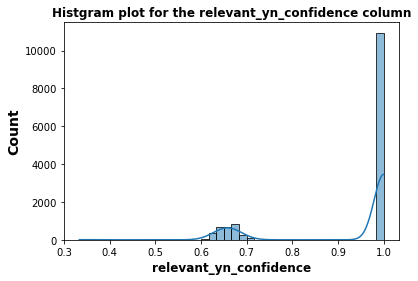

In [106]:
sns.histplot(df['relevant_yn_confidence'],bins=40,kde='True')
plt.xlabel('relevant_yn_confidence',fontweight='bold',fontsize = 12)
plt.ylabel('Count',fontweight='bold',fontsize = 14)
plt.title("Histgram plot for the relevant_yn_confidence column",fontweight='bold')
plt.show()


In [109]:
df[df['relevant_yn_confidence']==1].shape

(10943, 13)

We can observe that column 'relevant_yn' has only values 'Yes' for the entire dataset. <br/>
78% of the 'relevant_yn_confidence' is 1 (means 100% confidence)  


In [116]:
# Hence we can discard these columns for the modeling

df = df.drop(['relevant_yn','relevant_yn_confidence'],axis=1)
df.shape

(13871, 11)

In [120]:
df.columns

Index(['sentiment', 'sentiment_confidence', 'subject_matter',
       'subject_matter_confidence', 'name', 'retweet_count', 'text',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [123]:
df['name'].unique()

array(['I_Am_Kenzi', 'PeacefulQuest', 'PussssyCroook', ..., 'JasonTheX',
       'DSW1991', 'stickybacksigns'], dtype=object)

In [130]:
len(df['name'].unique())

9829

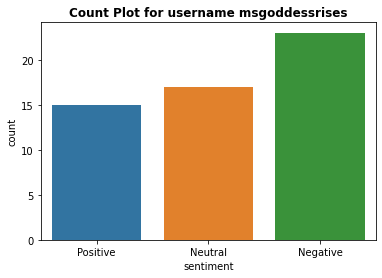

In [165]:
gd=df.groupby('name')
sns.countplot(gd.get_group('msgoddessrises')['sentiment'])
plt.title('Count Plot for username msgoddessrises',fontweight='bold')
plt.show()

We have oberserved that name have 9829 unique values.<br/>
The user with name 'msgoddessrises' have the highest entires with a value 55 in the entire dataset. <br/>
Out of 55 tweets:- <br/>
&emsp; 15 are Positive<br/>
&emsp;   23 are Negative<br/>
&emsp;   17 are Neutral<br/>
   
Follwed with the highest user, the other users along with their percentage are :-<br/><br/>
&emsp; RT0787           &emsp;42 (0.3%)<br/>
&emsp; b140tweet        &emsp;34 (0.2%)<br/>
&emsp; jojo21           &emsp;33 (0.2%)<br/>
&emsp; SupermanHotMale  &emsp;32 (0.2%)<br/>
&emsp; EusebiaAq        &emsp;30 (0.2%)<br/>
&emsp; scottaxe         &emsp;29 (0.2%)<br/>
&emsp; BigBoyBaker      &emsp;25 (0.2%)<br/>
&emsp; LauriePatriot    &emsp;24 (0.2%)<br/>
&emsp; PuestoLoco       &emsp;24 (0.2%)<br/>


In [166]:
df.columns

Index(['sentiment', 'sentiment_confidence', 'subject_matter',
       'subject_matter_confidence', 'name', 'retweet_count', 'text',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

Text(0.5, 0, 'retweet_count')

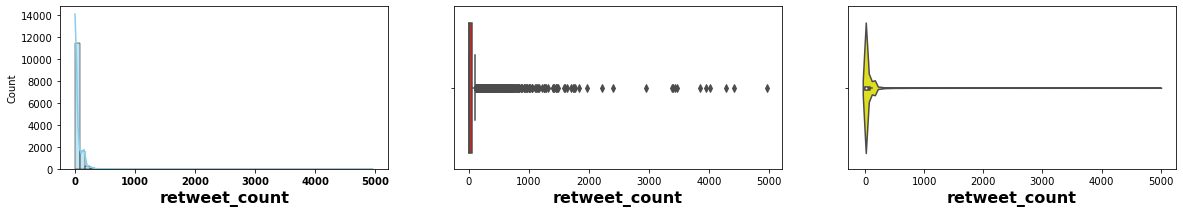

In [197]:
col = 'retweet_count'

f = plt.figure(figsize=(20,3))
plt.subplot(1,3,1)
plt.ticklabel_format(style='plain')
sns.histplot(data=df,x = col,color='skyblue',bins = 60,kde=True,multiple='dodge')
plt.xlabel(col,fontweight='bold',fontsize = 16)
plt.xticks(fontweight='bold',)

plt.subplot(1,3,2)
sns.boxplot(data=df,x = col,color='red')
plt.xlabel(col,fontweight='bold',fontsize = 16)

plt.subplot(1,3,3)
plt.ticklabel_format(style='plain')
sns.violinplot(data=df,x = col,color='yellow')
plt.xlabel(col,fontweight='bold',fontsize = 16)


In [205]:
df[df['retweet_count']==4965]['text']

29    RT @HillaryClinton: Watch the #GOPdebate? Bet ...
Name: text, dtype: object


In [210]:
df['retweet_count'].mean()

45.80333068992863

We can see that column retweet_count is positively skewed. <br/>
Seems like most of the values are Outliers.<br/>
The highest recount vaue is 4975 and the corresponding tweet is :- <br/>

&emsp;&emsp;RT @HillaryClinton: Watch the #GOPdebate? Bet ...


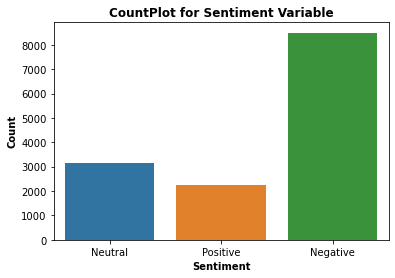

In [217]:
sns.countplot(df['sentiment'])
plt.xlabel('Sentiment',fontweight ='bold')
plt.ylabel('Count',fontweight ='bold')
plt.title('CountPlot for Sentiment Variable',fontweight ='bold')
plt.show()

We see that most of the tweets are 'Negative'

# MODELING

In [905]:
# For the sake of less complexity we make use of 2 columns

In [230]:
data = df[['text','sentiment']]
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [231]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.2)

In [692]:
print("Trainig data length is :",len(train))
print("Testing data length is :",len(test))


Trainig data length is : 11096
Testing data length is : 2775


In [726]:
#Grouping the Traing data according to the Polarity
gd_data = train.groupby('sentiment')
gd_data.get_group('Neutral')['text']

5408     RT @MSignorile: Ok, that gave us a lot of mate...
12716    RT @RWSurferGirl: I think Cruz and Trump need ...
5240     RT @aqv21: How #Hillary Looked When Watching #...
5173     The perfect remedy for a #GOPDebate hangover i...
11211    Now it's time to play Are You Smarter Than a N...
                               ...                        
9065     RT @MelissaFwu: Our watch party minutes before...
3408     RT @kevantrich: @mtaibbi the pimp lobby is NOT...
10778    RT @goldietaylor: Commercial break! #GOPDebate...
11450    RT @RWSurferGirl: I think Cruz and Trump need ...
6904     Why's #Hillary the #clearchoice for #Dems? No ...
Name: text, Length: 2526, dtype: object

In [727]:
#Lets seperate the tweets based on the Polarity

train_positive = gd_data.get_group('Positive')['text']
train_negative = gd_data.get_group('Negative')['text']
train_neutral = gd_data.get_group('Neutral')['text']

In [ ]:
import re
import string
import nltk

# Download the stopwords if they are not downloaded
nltk.download('stopwords')

# Download the below lemme if they are not downloaded for performing lemmatizarion
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [345]:

def remove_RT_tag(param_x):
    """
    RT stands for Retweet. If it is the Retweet, then it starts with 'RT @username:'
    This function will remove that ,if the given message is the ReTweet
    """
    return re.sub('(RT @[^s]+:)','',param_x)

def remove_URL(param_x):
    """
    This function will remove if any URL's present in the message.
    """
    
    return re.sub('((www.[^s]+)|(https?://[^s]+))','',param_x)

def remove_punctuations(param_x):
    """
    This function will remove the punctuation's which are presented in the text.
    The punctuation list can be imported from the String library.
    """
    #getting the punctuation list
    punctuations_list = string.punctuation

    translater = str.maketrans('','',punctuations_list)
    return param_x.translate(translater)

def remove_stopwords(param_x):
    """
    This function will remove the stopwords present in the tweet data
    """
    STOPWORDS = set(stopwords.words('english'))
    return [i for i in param_x if i.lower() not in STOPWORDS]

def lemmatizer_on_text(param_x):
    """
    This function will perform Lemmatization on the given text
    """
    lm = nltk.WordNetLemmatizer()
    return [lm.lemmatize(word) for word in param_x]

In [722]:
def process_data(df):
    """
    This function will perfrom the pre processing steps like 
    1. Removing URL's
    2. Removing Punctuation
    3. Removing Stopwords
    4. Applying Tokenization
    5. Applying Lemmatization
    
    by using the function which are defined previously.
    
    returns : a series where each object in the series is a List
    """
    
    #Removing the RT tag ( Re-Tweet Tag)
    df = df.apply(lambda x :remove_RT_tag(x) )
    
    #Removing the URL's from text
    df = df.apply(lambda x :remove_URL(x) )
    
    #Removing the Punctuation's from text
    df = df.apply(lambda x :remove_punctuations(x) )

    #Perfoming the tokenization
    df = df.apply(lambda x :word_tokenize(x))
    
    #Removing the Stop Words
    df = df.apply(lambda x :remove_stopwords(x))

    #Perfoming the Lemmatization
    df = df.apply(lambda x :lemmatizer_on_text(x))

    return df

In [728]:
train_positive_processed = process_data(train_positive)
train_negative_processed = process_data(train_negative)
train_neutral_processed = process_data(train_neutral)


In [806]:
test_X = process_data(test['text'])
test_Y = test['sentiment']

In [474]:
def draw_wordcloud(df):
    """
    Function to get the Word cloud for the given text
    """
    text = ''
    for i in range(len(df)):
        text = text +  " ".join(df.iloc[i])

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="Black").generate(text)
    return wordcloud


Word Cloud for Training Data


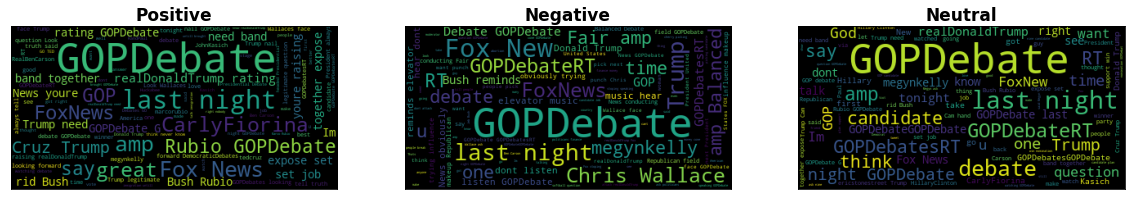

In [729]:
f = plt.figure(figsize=(20,3))
Sentiment = {"Positive":train_positive_processed,
             "Negative":train_negative_processed,
             "Neutral":train_neutral_processed,
              }
index = 1
for review in Sentiment:
    plt.subplot(1,3,index)
    plt.ticklabel_format(style='plain')
    wordcloud = draw_wordcloud(Sentiment[review])
    plt.imshow(wordcloud)
    plt.title(review,fontweight='bold',fontsize = 17)
    plt.xticks([])
    plt.yticks([])
    
    index = index + 1
print("Word Cloud for Training Data")

In [775]:
# Getting the list of all words
all_words = []
dump = [all_words.extend(i) for i in train_positive_processed]
dump = [all_words.extend(i) for i in train_negative_processed]
dump = [all_words.extend(i) for i in train_neutral_processed]
all_words

In [731]:
#Using FreqDist where keys will be the Features & and the value will be the corresponding count of those words
# Getting the top most 15 words in the training set
(nltk.FreqDist(all_words)).most_common(15)

[('GOPDebate', 6256),
 ('GOPDebates', 3591),
 ('RT', 1806),
 ('🇺🇸', 1449),
 ('Trump', 1355),
 ('candidate', 878),
 ('realDonaldTrump', 828),
 ('amp', 826),
 ('Fox', 802),
 ('debate', 720),
 ('night', 698),
 ('News', 663),
 ('last', 634),
 ('like', 562),
 ('question', 558)]

In [733]:
# Getting the features from WOrds. We select the most common 1000 words as features
# These features are used for constructing the Feature vector
word_features = [i[0] for i in (nltk.FreqDist(all_words)).most_common(1000)]

In [865]:
def find_features(review:list ,word_features: list)-> dict:
    """
    This function will construct a feature vector for each review 
    param review : List object as a input parameter, for which we need to construct the feature vector 
    param word_features : List object as a input parameter which contains all the features
    
    returns : A dictionary where keys are the features and values are binary
    """
    
    all_words = []
    # Extracting all the words from the review list
    words = set(all_words.extend(i) for i in review)
    
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features


Sentiment = {</br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"Positive":train_positive_processed, </br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"Negative":train_negative_processed, </br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"Neutral":train_neutral_processed, </br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;}</br></br>

We have seen above Sentiment is a dictionary, where keys are the Polarities & Values are the corresponding tweets after processing


In [866]:
# Creating an empty list to store each review as a feature vector & the corresponding Polarity as a sublists
# i.e., each value is a list [feature_review, Polaity]

training_featuredata = []
# Iterating over the training data
for category,data in Sentiment.items():
    for rev in data:
        training_featuredata.append([find_features(rev,word_features), category])


In [861]:
test_X

9402     [there, one, thing, certain, FoxNews, want, re...
6656     [Jeb, need, reality, check, brother, messed, I...
7801     [predebate, megynkelly, “, Oh, secret, plan, d...
9642     [RT, Disruptepreneur, Wow, primary, source, en...
4514     [RT, ProfessorCrunk, purpose, military, kill, ...
                               ...                        
780      [Disappointed, surprisingly, GOPDebate, didnt,...
1780                     [Something, something, GOPDebate]
13166    [Jeb, Bush, reminds, elevator, music, hear, do...
7979     [couple, GOPDebates, like, one, MegynKelly, vo...
8164     [Opening, closing, amp, occasionally, canned, ...
Name: text, Length: 2775, dtype: object

In [874]:
# Creating an empty list to testing_features_X store each review as a feature vector for the testing data
# i.e., each value is a list [feature_review]

testing_features_X = []
# Iterating over the testing data
for rev in test_X:
        
        testing_features_X.append(find_features(rev,word_features))


In [875]:
# Traing the Naiev Bayes Classifier on the training features
classifier = nltk.NaiveBayesClassifier.train(training_featuredata)


In [869]:
classifier.classify_many(testfeatures_X[1:3])

['Negative', 'Negative']

In [885]:
nltk.classify.accuracy(classifier, training_featuredata)

0.6115717375630858

We can see that the accuracy of the classifier is 61.15%

In [769]:
sorted(classifier.labels())


['Negative', 'Neutral', 'Positive']

In [770]:
classifier.show_most_informative_features()


Most Informative Features
                       1 = False          Negati : Positi =      1.0 : 1.0
                      10 = False          Negati : Positi =      1.0 : 1.0
                     100 = False          Negati : Positi =      1.0 : 1.0
                      16 = False          Negati : Positi =      1.0 : 1.0
                     1st = False          Negati : Positi =      1.0 : 1.0
                       2 = False          Negati : Positi =      1.0 : 1.0
                    2015 = False          Negati : Positi =      1.0 : 1.0
                    2016 = False          Negati : Positi =      1.0 : 1.0
                     2nd = False          Negati : Positi =      1.0 : 1.0
                       3 = False          Negati : Positi =      1.0 : 1.0


What this tells you is the ratio of occurences in negative to positive, or visa versa, for every word.
So here, we can see that the term "insulting" appears 10.6 more times as often in negative reviews as it does in positive reviews. Ludicrous, 10.1.

In [888]:
# Showing the probability for 10 tweets
for pdist in classifier.prob_classify_many(testfeatures_X[0:10]):
    print('%.4f %.4f %.4f' % (pdist.prob('Positive'), pdist.prob('Negative'),pdist.prob('Neutral')))

0.1608 0.6115 0.2277
0.1608 0.6115 0.2277
0.1608 0.6115 0.2277
0.1608 0.6115 0.2277
0.1608 0.6115 0.2277
0.1608 0.6115 0.2277
0.1608 0.6115 0.2277
0.1608 0.6115 0.2277
0.1608 0.6115 0.2277
0.1608 0.6115 0.2277


In [904]:
from sklearn.metrics import confusion_matrix

train_y = [i[1] for i in training_featuredata]
train_x = [i[0] for i in training_featuredata]

Y_true = classifier.classify_many(train_x)
confusion_matrix(Y_true,train_y)


array([[6786, 2526, 1784],
       [   0,    0,    0],
       [   0,    0,    0]])

In [891]:

Y_true = classifier.classify_many(testfeatures_X)
confusion_matrix(Y_true,test_Y)


array([[1707,  616,  452],
       [   0,    0,    0],
       [   0,    0,    0]])

We have seen Confusion matrix for both Testing Data & Training Data
From both the outputs, we can inspect that all the tweets have been classified as negative.
 
To improve the model, instead of selecting the 1000 feature, we can select less most important features & perfrom few other Feature Engineering Techniques